# List of Indian Cadidates for Lok Sabha Election Data Analysis and Visualization

![](https://www.jagranjosh.com/imported/images/E/Others/parliament1.webp)

## Import Required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('fivethirtyeight')

## Load Dataset

In [2]:
%time candidates_2004 = pd.read_csv('../input/lok-sabha-election-candidate-list-2004-to-2019/LokSabha2004.csv')
%time candidates_2009 = pd.read_csv('../input/lok-sabha-election-candidate-list-2004-to-2019/LokSabha2009.csv')
%time candidates_2014 = pd.read_csv('../input/lok-sabha-election-candidate-list-2004-to-2019/LokSabha2014.csv')
%time candidates_2019 = pd.read_csv('../input/lok-sabha-election-candidate-list-2004-to-2019/LokSabha2019.csv')

CPU times: user 11.6 ms, sys: 9.01 ms, total: 20.6 ms
Wall time: 44.9 ms
CPU times: user 14.9 ms, sys: 8.78 ms, total: 23.7 ms
Wall time: 36.5 ms
CPU times: user 16.5 ms, sys: 5.93 ms, total: 22.4 ms
Wall time: 32 ms
CPU times: user 16.4 ms, sys: 3.65 ms, total: 20.1 ms
Wall time: 25.2 ms


We have data file for each year. So let merge them in one file. before doing that I am going to add year column.

In [3]:
candidates_2004['Year'] = 2004
candidates_2009['Year'] = 2009
candidates_2014['Year'] = 2014
candidates_2019['Year'] = 2019

Now we have year column in each data frame. Let's merge them in once data frame using `pd.concat` method.

In [4]:
candidates = pd.concat([candidates_2004, candidates_2009, candidates_2014, candidates_2019])

## Statistics of Data

Let's have a look at example samples.

In [5]:
candidates.head(10)

,Candidate,Party,Criminal Cases,Education,Age,City,Year
0,MANORANJAN BHAKTA,INC,0,Post Graduate,65,Andaman & Nicobar Islands,2004
1,A K BISWAS,BSP,0,Graduate,61,Andaman & Nicobar Islands,2004
2,ASIT BARAN DUTTA,IND,0,Graduate,50,Andaman & Nicobar Islands,2004
3,BISHNU PADA RAY,BJP,0,Graduate,54,Andaman & Nicobar Islands,2004
4,DEEPAK BISWAS,IND,0,Not Given,28,Andaman & Nicobar Islands,2004
5,DR SHANMUGAM,LJNSP,0,Doctorate,66,Andaman & Nicobar Islands,2004
6,GOUR CHANDRA MAJUMDER,IND,0,Graduate,37,Andaman & Nicobar Islands,2004
7,K KALIMUTHU,IND,1,8th Pass,51,Andaman & Nicobar Islands,2004
8,K PERUMAL,SWD,0,Literate,65,Andaman & Nicobar Islands,2004
9,N K P NAIR,CPI(ML)(L),0,Literate,49,Andaman & Nicobar Islands,2004


In [6]:
candidates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28014 entries, 0 to 7967
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Candidate       28014 non-null  object
 1   Party           28014 non-null  object
 2   Criminal Cases  28014 non-null  int64 
 3   Education       28014 non-null  object
 4   Age             28014 non-null  int64 
 5   City            28014 non-null  object
 6   Year            28014 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 1.7+ MB


In [7]:
candidates.describe()

,Criminal Cases,Age,Year
count,28014.000000,28014.000000,28014.000000
mean,0.483901,46.487078,2012.708503
std,4.164205,12.546241,5.050962
min,0.000000,0.000000,2004.000000
25%,0.000000,37.000000,2009.000000
50%,0.000000,46.000000,2014.000000
75%,0.000000,55.000000,2019.000000
max,382.000000,94.000000,2019.000000


In [8]:
candidates.isnull().sum()

Candidate         0
Party             0
Criminal Cases    0
Education         0
Age               0
City              0
Year              0
dtype: int64

As we can see there is no null value in the data. 

In [9]:
candidates.shape

(28014, 7)

We have 28 thousand candidates details.

# Year wise Data Analysis and Visualization

## 1. Youngest Candidate who participated in Lok Sabha Election?

Some entries have value lesser than 18 so I am ignoring those value because that values are false.

In [10]:
candidate_age_2004 = candidates_2004[candidates_2004['Age'] > 18]
candidate_age_2009 = candidates_2009[candidates_2009['Age'] > 18]
candidate_age_2014 = candidates_2014[candidates_2014['Age'] > 18]
candidate_age_2019 = candidates_2019[candidates_2019['Age'] > 18]

In [11]:
candidate_age_2004[candidate_age_2004['Age'] == candidate_age_2004['Age'].min()]

,Candidate,Party,Criminal Cases,Education,Age,City,Year
393,OM PRAKASH PASWAN,AD,0,Not Given,25,Araria,2004
420,SARJOON PASWAN,IND,0,Not Given,25,Aurangabad,2004
550,SHAKTI RAJ,BSP,0,Graduate,25,Gaya,2004
556,MONIKA TIWARI,BED,0,Post Graduate,25,Gopalganj,2004
569,UTTAM CHOUDHARY UNNAT,JD(S),0,Post Graduate,25,Hajipur,2004
597,PREM KUMAR,SHS,0,Graduate,25,Katihar,2004
679,ANURODH PRAGAT,IND,0,Graduate,25,Muzaffarpur,2004
724,KUNJ BIHARI,IND,0,Not Given,25,Patna,2004
886,BADKURAM DHRUW,IND,0,Literate,25,Janjgir,2004
1214,SHAHZAD KHAN,IND,0,Not Given,25,Jammu,2004


In 2004's Lok Sabha Election,yougest candidate age was 25 years.

In [12]:
candidate_age_2009[candidate_age_2009['Age'] == candidate_age_2009['Age'].min()]

,Candidate,Party,Criminal Cases,Education,Age,City,Year
570,TABA TAKU,LB,0,Graduate,25,Arunachal West,2009
887,BINITA BAITHA,IND,0,Graduate,25,Gopalganj,2009
1017,MOHAMMAD NISSAR ALAM,JMM,0,8th Pass,25,Kishanganj,2009
1128,KUMAR RAJESH,IND,0,Graduate,25,Nalanda,2009
1174,DURGESH NANDAN SINGH,IND,0,Graduate Professional,25,Pataliputra,2009
1461,Santosh Banjare,IND,0,5th Pass,25,Korba,2009
1570,MULLA SALIM,IND,0,12th Pass,25,South Goa,2009
1625,BHARATBHAI BABUBHAI SOLANKI,IND,0,Literate,25,Anand,2009
1848,MEHULKUMAR KARSANBHAI CHANDRAVADIYA,BSP,3,Graduate,25,Porbandar,2009
1878,MAHESHBHAI HIRABHAI HARSODA,IND,0,Literate,25,Rajkot,2009


In [13]:
candidate_age_2014[candidate_age_2014['Age'] == candidate_age_2014['Age'].min()]

,Candidate,Party,Criminal Cases,Education,Age,City,Year
7242,Ravikant Yadav,IND,0,Graduate,21,JAUNPUR,2014


In [14]:
candidate_age_2019[candidate_age_2019['Age'] == candidate_age_2019['Age'].min()]

,Candidate,Party,Criminal Cases,Education,Age,City,Year
5774,Ponnuthai G,IND,0,12th Pass,24,TENKASI,2019


## Ravikant Yadav is youngest candidate, 21 Age who participated in 2014 lok sabha election.

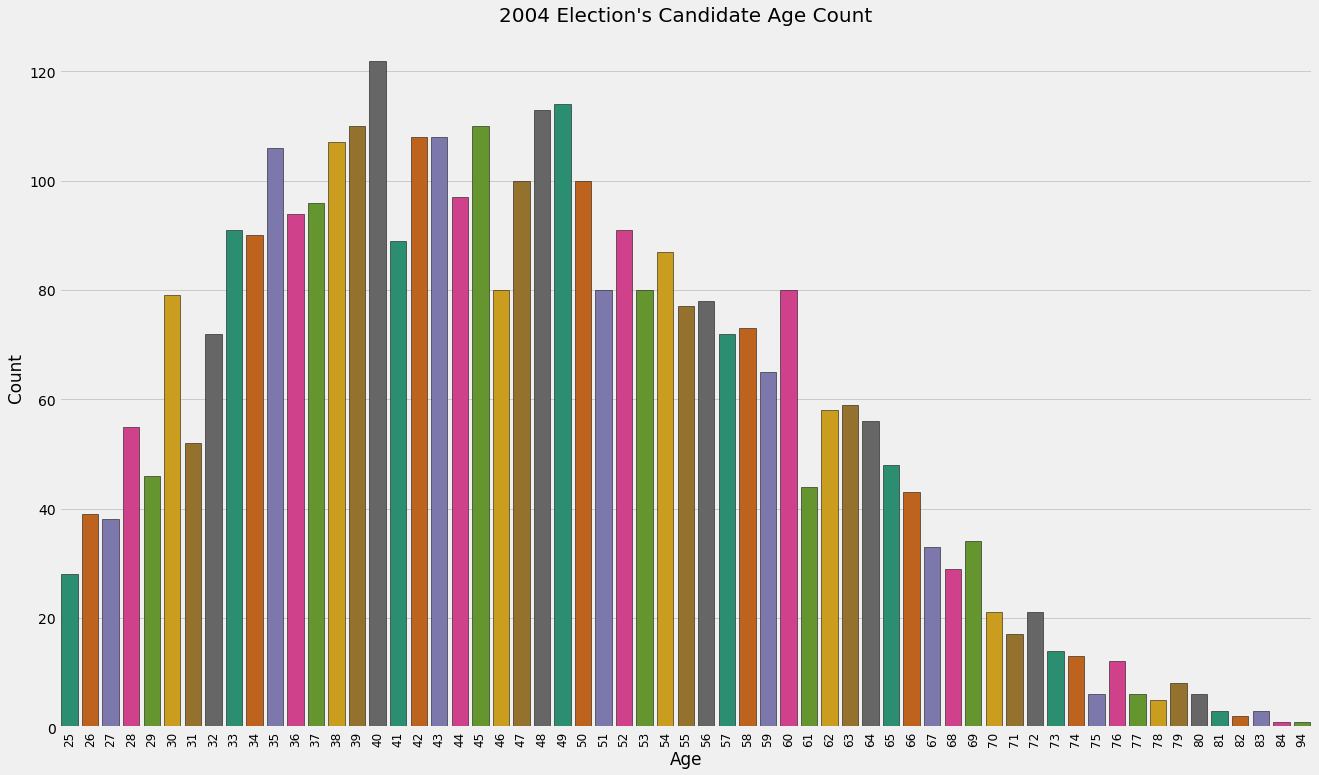

In [15]:
plt.figure(figsize=(20,12))
edgecolor=(0,0,0),
sns.countplot(candidate_age_2004['Age'].sort_values(), palette = "Dark2", edgecolor=(0,0,0))
plt.title("2004 Election's Candidate Age Count",fontsize=20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(fontsize=12,rotation=90)
plt.show()

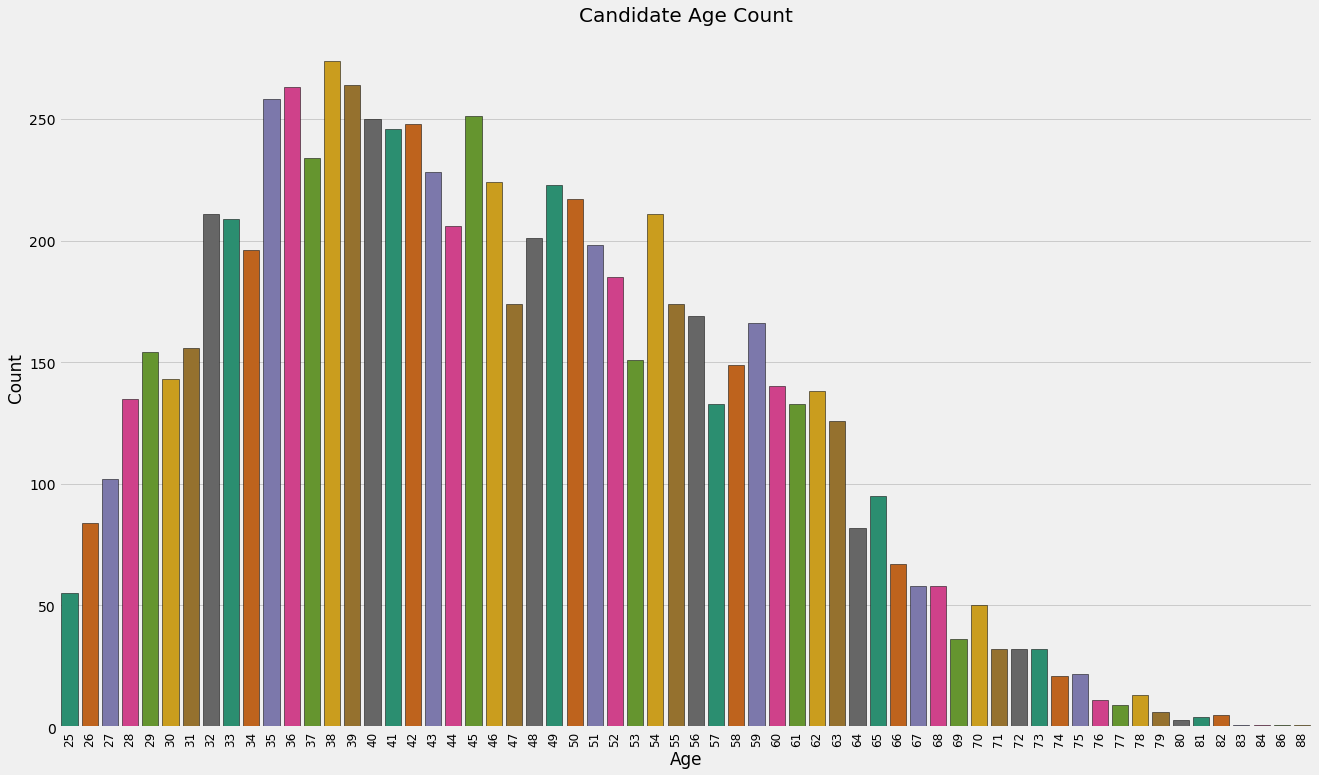

In [16]:
plt.figure(figsize=(20,12))
edgecolor=(0,0,0),
sns.countplot(candidate_age_2009['Age'].sort_values(), palette = "Dark2", edgecolor=(0,0,0))
plt.title("Candidate Age Count",fontsize=20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(fontsize=12,rotation=90)
plt.show()

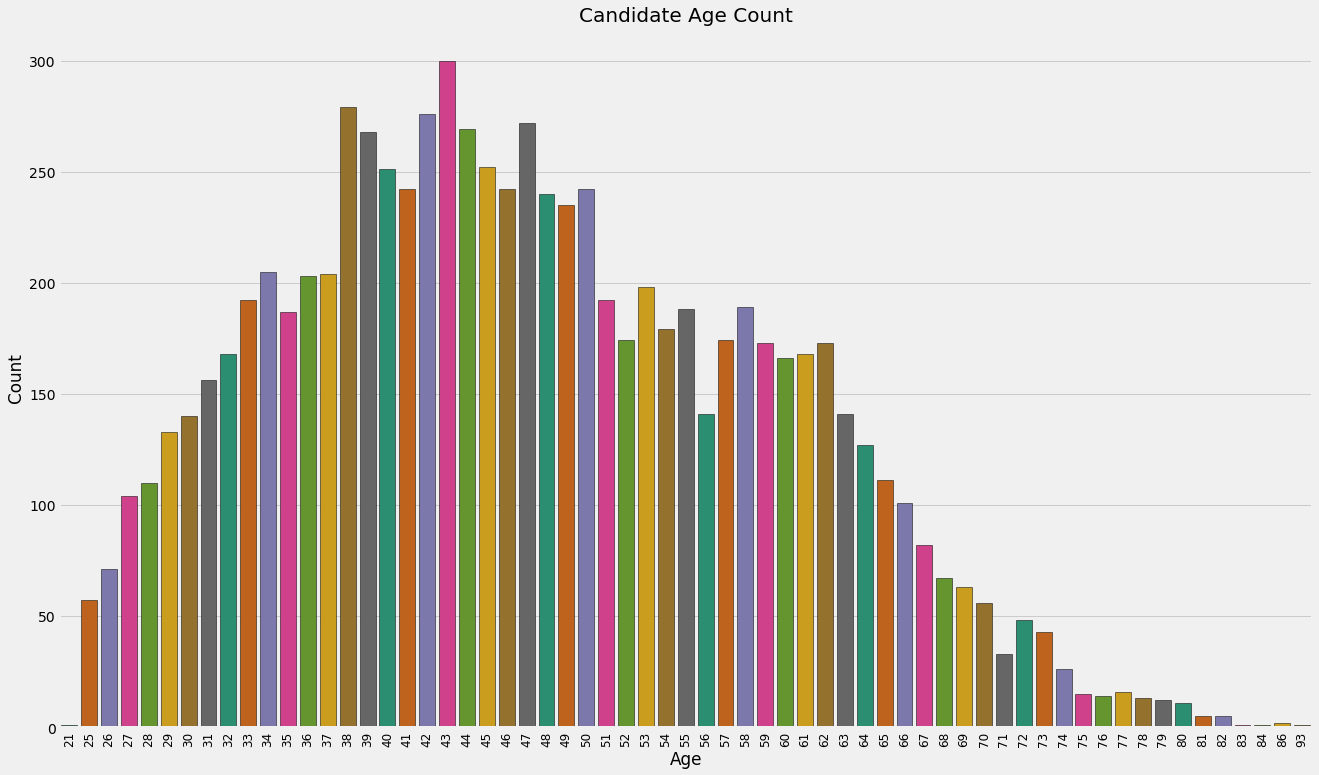

In [17]:
plt.figure(figsize=(20,12))
edgecolor=(0,0,0),
sns.countplot(candidate_age_2014['Age'].sort_values(), palette = "Dark2", edgecolor=(0,0,0))
plt.title("Candidate Age Count",fontsize=20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(fontsize=12,rotation=90)
plt.show()

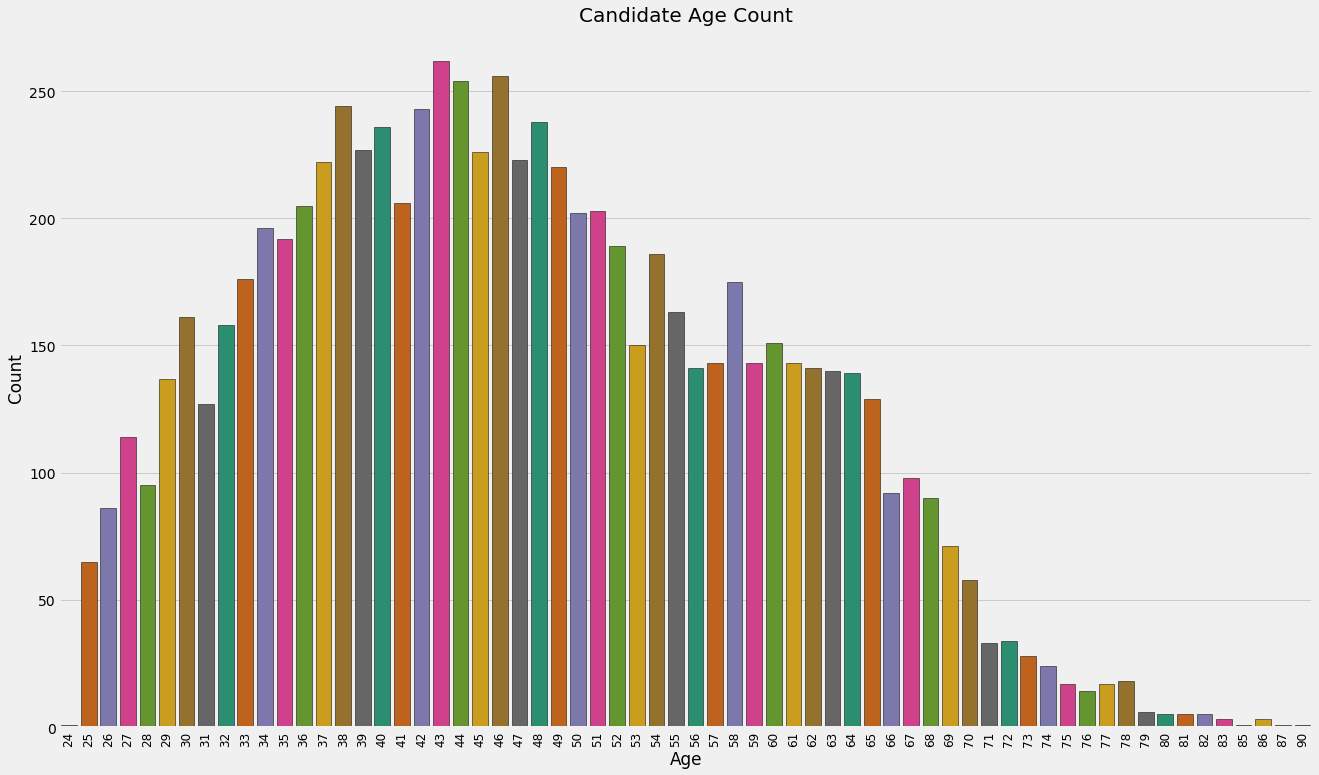

In [18]:
plt.figure(figsize=(20,12))
edgecolor=(0,0,0),
sns.countplot(candidate_age_2019['Age'].sort_values(), palette = "Dark2", edgecolor=(0,0,0))
plt.title("Candidate Age Count",fontsize=20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(fontsize=12,rotation=90)
plt.show()

In [19]:
candidates['Age'].value_counts()

38    904
43    898
42    875
39    869
40    859
     ... 
88      1
90      1
93      1
94      1
24      1
Name: Age, Length: 71, dtype: int64

## There are 904 candidates who are 38 years old. 

## 2. Candidate with Highest number of Criminal Cases.

In [20]:
candidates_2004[candidates_2004['Criminal Cases'] == candidates_2004['Criminal Cases'].max()]

,Candidate,Party,Criminal Cases,Education,Age,City,Year
3144,ATIQUE AHAMAD,SP,36,8th Pass,41,Phulpur,2004


In [21]:
candidates_2009[candidates_2009['Criminal Cases'] == candidates_2009['Criminal Cases'].max()]

,Candidate,Party,Criminal Cases,Education,Age,City,Year
2427,KAMESHWAR BAITHA,JMM,46,10th Pass,56,Palamau,2009


In [22]:
candidates_2014[candidates_2014['Criminal Cases'] == candidates_2014['Criminal Cases'].max()]

,Candidate,Party,Criminal Cases,Education,Age,City,Year
5714,Udayakumar S.p.,AAP,382,Doctorate,54,KANNIYAKUMARI,2014


In [23]:
candidates_2019[candidates_2019['Criminal Cases'] == candidates_2019['Criminal Cases'].max()]

,Candidate,Party,Criminal Cases,Education,Age,City,Year
2908,K Surendran,BJP,240,Graduate,49,PATHANAMTHITTA,2019


In [24]:
candidates.sort_values(['Criminal Cases'], ascending=False).head().style.background_gradient(subset = ['Age', 'Criminal Cases'], cmap = 'YlGn')

,Candidate,Party,Criminal Cases,Education,Age,City,Year
5714,Udayakumar S.p.,AAP,382,Doctorate,54,KANNIYAKUMARI,2014
6056,M.pushparayan,AAP,380,Post Graduate,46,THOOTHUKKUDI,2014
2908,K Surendran,BJP,240,Graduate,49,PATHANAMTHITTA,2019
2818,Dean Kuriakose,INC,204,Post Graduate,37,IDUKKI,2019
7432,Ateek Ahmad,IND,59,8th Pass,54,VARANASI,2019


## Candidate Udayakumar S.p. has highest number of criminal cases which are 382.

## Parties with total number of criminal cases.

In [25]:
criminal_cases_2004 = candidates_2004[['Party', 'Criminal Cases']].groupby('Party').sum('Criminal Cases')
criminal_cases_2009 = candidates_2009[['Party', 'Criminal Cases']].groupby('Party').sum('Criminal Cases')
criminal_cases_2014 = candidates_2014[['Party', 'Criminal Cases']].groupby('Party').sum('Criminal Cases')
criminal_cases_2019 = candidates_2019[['Party', 'Criminal Cases']].groupby('Party').sum('Criminal Cases')

In [26]:
criminal_cases_2004.sort_values(['Criminal Cases'], ascending=False).head(10).style.background_gradient(subset = ['Criminal Cases'], cmap = 'PuBu')

,Criminal Cases
Party,
IND,233
SP,181
BSP,167
BJP,153
INC,106
LJNSP,73
SHS,62
RJD,56
CPI(ML)(L),51


In [27]:
criminal_cases_2009.sort_values(['Criminal Cases'], ascending=False).head(10).style.background_gradient(subset = ['Criminal Cases'], cmap = 'PuBu')

,Criminal Cases
Party,
IND,755
BJP,284
BSP,241
INC,222
SP,183
CPI(ML)(L),114
CPM,109
JMM,81
SHS,80


In [28]:
criminal_cases_2014.sort_values(['Criminal Cases'], ascending=False).head(10).style.background_gradient(subset = ['Criminal Cases'], cmap = 'PuBu')

,Criminal Cases
Party,
AAP,911
IND,663
BJP,492
INC,368
BSP,288
SP,257
CPI(M),152
CPI(ML)L,120
JD(U),94


In [29]:
criminal_cases_2019.sort_values(['Criminal Cases'], ascending=False).head(10).style.background_gradient(subset = ['Criminal Cases'], cmap = 'PuBu')

,Criminal Cases
Party,
IND,950
BJP,910
INC,743
BSP,226
CPI(M),135
SHS,105
SP,81
NCP,61
RJD,52


## Independent candidates have highest number of criminal cases each year except 2014. 

## Number of candidate participated from each Party.

Text(0.5, 1.0, 'Different Political Party and Candidate Count')

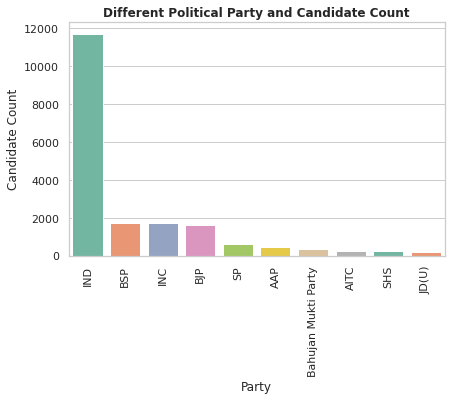

In [30]:
loc = candidates["Party"].value_counts()
sns.set(style="whitegrid")
sns.barplot(y=loc[:10], x=loc[:10].index, palette="Set2")
plt.xticks(rotation=90)
plt.xlabel('Party')
plt.ylabel('Candidate Count')
plt.title("Different Political Party and Candidate Count", fontweight="bold")

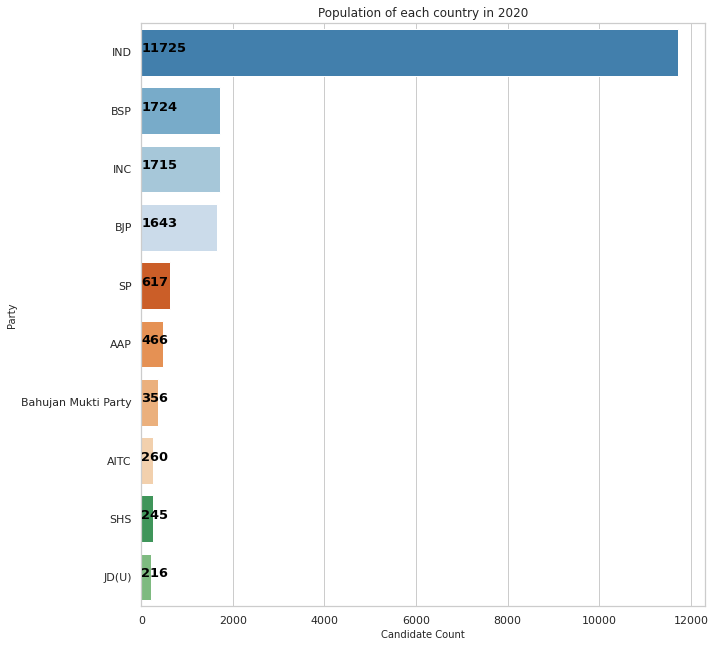

In [31]:
plt.figure(figsize=(9,10))
ax = sns.barplot(x=loc[:10], y=loc[:10].index,
                 palette="tab20c",
                 linewidth = 1)
for i,j in enumerate(loc[:10]):
    ax.text(.5, i, j, weight="bold", color = 'black', fontsize = 13)
plt.title("Population of each country in 2020")
ax.set_xlabel(xlabel = 'Candidate Count', fontsize = 10)
ax.set_ylabel(ylabel = 'Party', fontsize = 10)
plt.show()

## Education of each candidate.

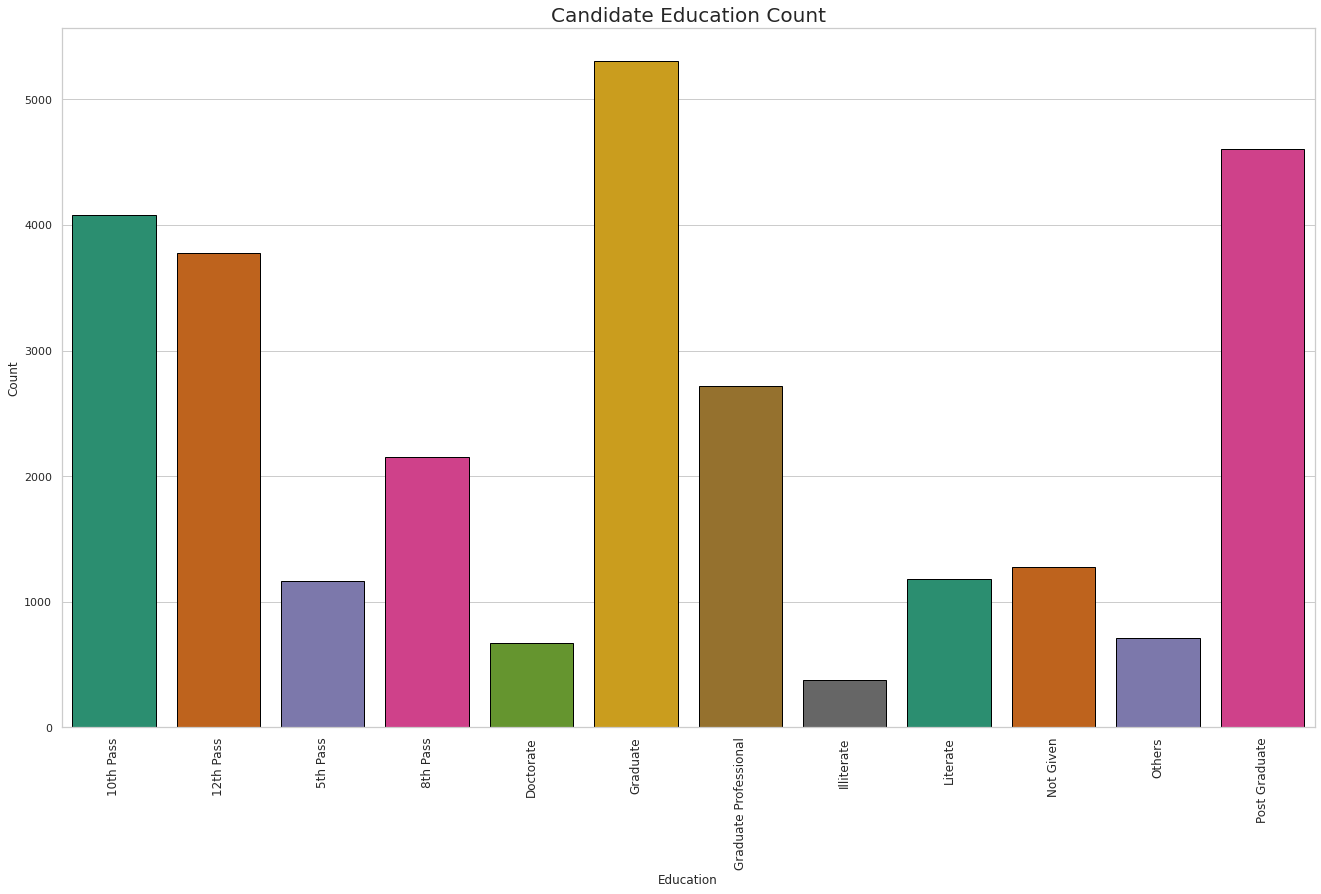

In [32]:
plt.figure(figsize=(20,12))
edgecolor=(0,0,0),
sns.countplot(candidates['Education'].sort_values(), palette = "Dark2", edgecolor=(0,0,0))
plt.title("Candidate Education Count",fontsize=20)
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(fontsize=12,rotation=90)
plt.show()

## Most comman education level is Graduation. 

In [33]:
candidate_education = candidates['Education'].value_counts()

In [34]:
candidate_education

Graduate                 5305
Post Graduate            4606
10th Pass                4082
12th Pass                3773
Graduate Professional    2715
8th Pass                 2150
Not Given                1276
Literate                 1181
5th Pass                 1167
Others                    709
Doctorate                 672
Illiterate                378
Name: Education, dtype: int64

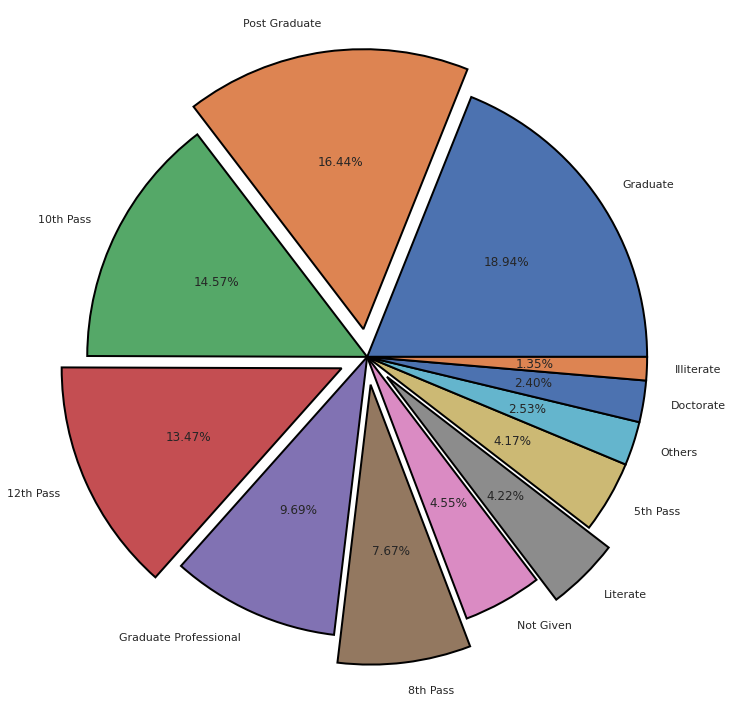

In [35]:
plt.figure(figsize=(20,12))
wedge_dict = {
    'edgecolor': 'black',
    'linewidth': 2        
}

explode = (0, 0.1, 0, 0.1, 0, 0.1, 0, 0.1, 0, 0, 0, 0)

plt.pie(candidate_education, explode=explode, autopct='%1.2f%%', wedgeprops=wedge_dict, labels = candidate_education.index)
plt.show()

## City with highest criminal cases

In [36]:
city_criminal_cases_2004 = candidates_2004[['City', 'Criminal Cases']].groupby('City').sum('Criminal Cases')
city_criminal_cases_2009 = candidates_2009[['City', 'Criminal Cases']].groupby('City').sum('Criminal Cases')
city_criminal_cases_2014 = candidates_2014[['City', 'Criminal Cases']].groupby('City').sum('Criminal Cases')
city_criminal_cases_2019 = candidates_2019[['City', 'Criminal Cases']].groupby('City').sum('Criminal Cases')

In [37]:
city_criminal_cases_2004.sort_values(['Criminal Cases'], ascending=False).head(10).style.background_gradient(subset = ['Criminal Cases'], cmap = 'PuBu')

,Criminal Cases
City,
Purnea,52
Sheohar,40
Maharajganj,38
Phulpur,38
Faizabad,31
Siwan,27
Pratapgarh,27
Aurangabad,23
Bettiah,22


Text(0.5, 1.0, 'Different Cities and Criminal cases count in 2004 Elections')

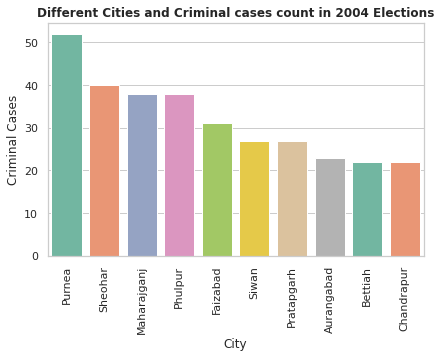

In [38]:
cases_2004 = city_criminal_cases_2004.sort_values(['Criminal Cases'], ascending=False)['Criminal Cases'][:10]

sns.barplot(y=cases_2004.values, x=cases_2004.index, palette="Set2")
plt.xticks(rotation=90)
plt.xlabel('City')
plt.ylabel('Criminal Cases')
plt.title("Different Cities and Criminal cases count in 2004 Elections", fontweight="bold")

In [39]:
city_criminal_cases_2009.sort_values(['Criminal Cases'], ascending=False).head(10).style.background_gradient(subset = ['Criminal Cases'], cmap = 'PuBu')

,Criminal Cases
City,
Chandauli,67
Nawada,56
Khagaria,55
Palamau,50
Chandrapur,40
Dhule,39
Araria,34
Cuddalore,33
Aurangabad,30


Text(0.5, 1.0, 'Different Cities and Criminal cases count in 2009 Elections')

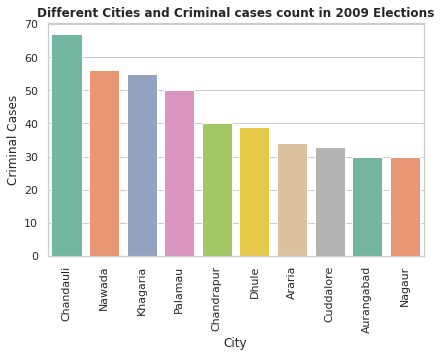

In [40]:
cases_2009 = city_criminal_cases_2009.sort_values(['Criminal Cases'], ascending=False)['Criminal Cases'][:10]
sns.barplot(y=cases_2009.values, x=cases_2009.index, palette="Set2")
plt.xticks(rotation=90)
plt.xlabel('City')
plt.ylabel('Criminal Cases')
plt.title("Different Cities and Criminal cases count in 2009 Elections", fontweight="bold")

In [41]:
city_criminal_cases_2014.sort_values(['Criminal Cases'], ascending=False).head(10).style.background_gradient(subset = ['Criminal Cases'], cmap = 'PuBu')

,Criminal Cases
City,
KANNIYAKUMARI,403
THOOTHUKKUDI,391
PHULPUR : BYE ELECTION ON 11-03-2018,61
PALAMAU,60
HOWRAH,59
PURULIA,57
SHRAWASTI,49
SATARA,44
KARAKAT,40


Text(0.5, 1.0, 'Different Cities and Criminal cases count in 2014 Elections')

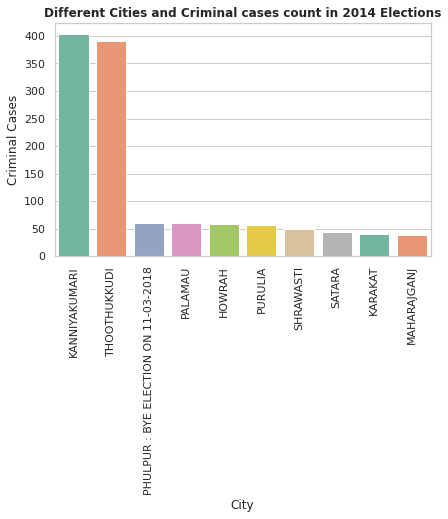

In [42]:
cases_2014 = city_criminal_cases_2014.sort_values(['Criminal Cases'], ascending=False)['Criminal Cases'][:10]
sns.barplot(y=cases_2014.values, x=cases_2014.index, palette="Set2")
plt.xticks(rotation=90)
plt.xlabel('City')
plt.ylabel('Criminal Cases')
plt.title("Different Cities and Criminal cases count in 2014 Elections", fontweight="bold")

In [43]:
city_criminal_cases_2019.sort_values(['Criminal Cases'], ascending=False).head(10).style.background_gradient(subset = ['Criminal Cases'], cmap = 'PuBu')

,Criminal Cases
City,
PATHANAMTHITTA,241
IDUKKI,220
VARANASI,78
ADILABAD,55
ATTINGAL,51
AMETHI,49
MALKAJGIRI,46
SUNDARGARH,46
BARRACKPUR,42


Text(0.5, 1.0, 'Different Cities and Criminal cases count in 2019 Elections')

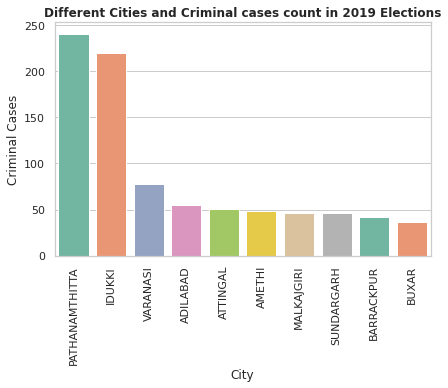

In [44]:
cases_2019 = city_criminal_cases_2019.sort_values(['Criminal Cases'], ascending=False)['Criminal Cases'][:10]
sns.barplot(y=cases_2019.values, x=cases_2019.index, palette="Set2")
plt.xticks(rotation=90)
plt.xlabel('City')
plt.ylabel('Criminal Cases')
plt.title("Different Cities and Criminal cases count in 2019 Elections", fontweight="bold")

## Work in Progress... ⏳